# Machine Learning algorithms for the detection and localization of surgically resectable cancers
**Project mentor:** Joshua Popp

**Members:** Chris Wilhelm <cwilhel8@jh.edu>, Jayden Kunwar <jkunwar1@jhu.edu>, <br> Bryce Thalheimer <bthalhe1@jh.edu>, Arthur Beyer <cbeyer4@jhu.edu>

**GitHub Repository:** <br>
<https://github.com/ChrisWilhelm/MachineLearningFinalProject>

**Inspiration for Project:** <br>
<https://www.science.org/doi/10.1126/science.aar3247?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%20%200pubmed>

# Outline and Deliverables

### Uncompleted Deliverables
1. "Expect to complete #1": Discussed data pre-processing with Josh and concluded that it wasn't necessary for our dataset
2. "Expect to complete #3": Multi-Class Classification of Cancer Type
3. "Would like to complete #2": Additional Data


### Completed Deliverables
1. "Must complete #1": We discuss our logistic regression [in "Models" below](#scrollTo=PqB48IF9kMBf).
2. "Must complete #2": We discuss training our neural network [in "Models" below](#scrollTo=PqB48IF9kMBf).
3. "Must complete #3": We discuss AdaBoost [in "Models" below](#scrollTo=PqB48IF9kMBf).
4. "Expect to complete #2": We discussed interpretability...
6. "Would like to complete #1": High Specificity
6. "Would like to complete #3": Cancer Localization


### Additional Deliverables
(example) 1. We decided to add a second baseline using the published model from this paper. We discuss this [in "Baselines" below](#scrollTo=oMyqHUa0jUw7&line=5&uniqifier=1).
2. ...

# Preliminaries

## What problem were you trying to solve or understand?


What are the real-world implications of this data and task?

How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?

What makes this problem unique?

What ethical implications does this problem have?

## Dataset(s)

### Describe the dataset(s) you used.
From the original CancerSeek research paper, we used their dataset of many biomarkers and demographic data in our models. We decided to create 4 main datasets. 1) All Biographic and Demographic Markers, 2) All Biographic Markers, 3) The biographic markers used in the student, and 4) All the Biographic Markers and Demographic markers for those with Colorectum cancer or no cancer. The starting unfiltered dataset has 41 proteins biomarkers, a circulating tumor mutant dna score, along with age and sex.

### How were they collected?
They were collected in the original research paper from real patients and using a multi-analyte blood test.

### Why did you choose them?
There was an abundant dataset with a binary classification for if they had cancer or not.

### How many examples in each?
There were 1817 total patients, of which 1005 had cancer and 812 were healthy

In [31]:
# Load your data and print 2-3 examples
import pandas as pd
dataset = pd.read_csv('dataset/Consolidated_CancerSEEK_Data.csv')
dataset.tail()

,Patient ID #,Sample ID #,Age,Sex,Race,Tumor type,AJCC Stage,Ω score,AFP (pg/ml),Angiopoietin-2 (pg/ml),...,SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result,Ground Truth
1812,INDI 512,INDI 512 PLS 1,47,0,Caucasian,Breast,II,0.47,822.14,957.01,...,74.82,4988.91,6307.44,16.54,1938.02,26202.06,29944.38,0.54,0,1
1813,INDI 702,INDI 702 PLS 1,74,1,Caucasian,Lung,II,3.95,1349.07,1797.39,...,56.90,7043.37,5733.90,16.42,851.95,73591.88,49041.89,1.00,1,1
1814,INDI 048,INDI 048 PLS 1,79,0,Caucasian,Breast,II,0.96,781.39,2075.34,...,82.84,6950.00,3688.73,16.10,2229.28,74090.65,60138.60,0.82,0,1
1815,LCR 592,LCR 592 PLS1,53,0,Caucasian,Normal,0,0.97,2782.15,759.62,...,39.37,5191.54,7320.91,16.69,10500.61,89932.52,54069.72,0.30,0,0
1816,PANC 760,PANC 760 PLS 1,48,1,Caucasian,Pancreas,II,0.45,849.62,662.45,...,88.18,8688.23,5769.60,15.94,6547.37,58818.44,55151.19,1.00,1,1


## Pre-processing

### What features did you use or choose not to use? Why?
For the features, we decided to approach it by creating 3 datasets.

### If you have categorical labels, were your datasets class-balanced?

### How did you deal with missing data? What about outliers?

### What approach(es) did you use to pre-process your data? Why?

### Are your features continuous or categorical? How do you treat these features differently?

In [32]:
# For those same examples above, what do they look like after being pre-processed?

In [33]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import confusion_matrix

df = pd.read_csv("dataset/Consolidated_CancerSEEK_Data.csv")
array = df.values
# np.unique(array[:, 5], return_index=False, return_inverse=False, return_counts=False, axis=None)
cancerTypes = ['Breast', 'Colorectum', 'Esophagus', 'Liver', 'Lung', 'Normal',
       'Ovary', 'Pancreas', 'Stomach']
cancerTypeCases = []

# cases for each cancer type
for i in range(len(cancerTypes)):
    cancerTypeCases.append(array[:, 5][array[:, 5] == cancerTypes[i]].shape[0])
    if cancerTypes[i] == 'Normal':
        print("Normal cases: " + str(cancerTypeCases[i]))
    else:
        print(cancerTypes[i] + " cancer cases: " + str(cancerTypeCases[i]))

Breast cancer cases: 209
Colorectum cancer cases: 388
Esophagus cancer cases: 45
Liver cancer cases: 44
Lung cancer cases: 104
Normal cases: 812
Ovary cancer cases: 54
Pancreas cancer cases: 93
Stomach cancer cases: 68


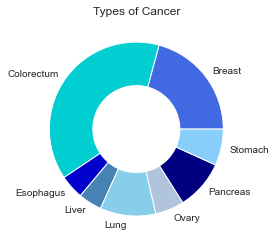

In [34]:
names = ['Breast', 'Colorectum', 'Esophagus', 'Liver', 'Lung', 'Ovary', 'Pancreas', 'Stomach']
size = [209, 388, 45, 44, 104, 54, 93, 68]

my_circle = plt.Circle( (0,0), 0.5, color='white')

plt.pie(size, labels=names, colors=['royalblue', 'darkturquoise', 'mediumblue',
                                    'steelblue', 'skyblue', 'lightsteelblue', 'navy', 'lightskyblue'])

# pie chart of cancer types
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Types of Cancer")
plt.show()

In [35]:
stageTypes = ['0', 'I', 'II', 'III']
stageTypeCases = []

for i in range(len(stageTypes)):
    stageTypeCases.append(array[1:, 6][array[1:, 6] == stageTypes[i]].shape[0])
    print("Stage " + stageTypes[i] + " cancer cases: " + str(stageTypeCases[i]))

Stage 0 cancer cases: 812
Stage I cancer cases: 199
Stage II cancer cases: 496
Stage III cancer cases: 309


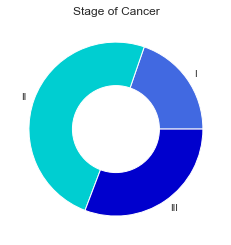

In [36]:
names = ['I', 'II', 'III']
size = [198, 497, 309]

my_circle = plt.Circle( (0,0), 0.5, color='white')

plt.pie(size, labels=names, colors=['royalblue', 'darkturquoise', 'mediumblue'])

# pie charts of stage types
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Stage of Cancer")
plt.show()

In [37]:
# distribution of control and cancer patients
cancerPatient = 0
controlPatient = 0
totalCases = 1817.
for value in array[:, 49]:
    if value == 1:
        cancerPatient += 1
    else:
        controlPatient += 1

print("Total number of cancer patients: " + str(cancerPatient))
print("Total number of healthy patients: " + str(controlPatient))

Total number of cancer patients: 1005
Total number of healthy patients: 812


In [38]:
tpr = 0
tnr = 0
fpr = 0
fnr = 0

predAndActual = array[:, 48:]

# counting tpr, tnr, fpr, fnr cases
for i in range(len(predAndActual)):
    if predAndActual[i,0] == 0:
        if predAndActual[i,0] == predAndActual[i,1]:
            tnr += 1
        else:
            fnr += 1
    else:
        if predAndActual[i,0] == predAndActual[i,1]:
            tpr += 1
        else:
            fpr += 1
# creating confusion matrix
cf_matrix = np.zeros((2, 2))
cf_matrix[0,0] = 805
cf_matrix[0,1] = 7
cf_matrix[1,0] = 379
cf_matrix[1,1] = 626
print("Original Study:")
print(cf_matrix)

Original Study:
[[805.   7.]
 [379. 626.]]


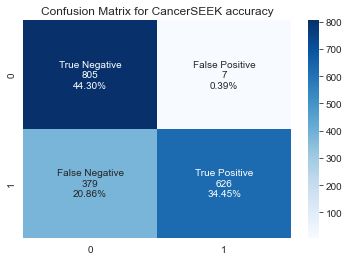

In [39]:
# plotting confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(cf_matrix, annot=labels, fmt = '', cmap='Blues', ax = ax)
ax.set_title('Confusion Matrix for CancerSEEK accuracy')
plt.show()

In [40]:
# initializing variables to count fnr or tpr / stage types
tpr = 0
tnr = 0
fpr = 0
fnr = 0
count11 = 0
count12 = 0
count13 = 0
count21 = 0
count22 = 0
count23 = 0

predAndActual = array[:, 48:]

for i in range(len(predAndActual)):
    if predAndActual[i,0] == 0:
        if predAndActual[i,0] == predAndActual[i,1]:
            tnr += 1
        else:
            fnr += 1
            if array[i,6] == 'I':
                count11 += 1
            elif array[i,6] == 'II':
                count12 += 1
            elif array[i,6] == 'III':
                count13 += 1


    else:
        if predAndActual[i,0] == predAndActual[i,1]:
            tpr += 1
            if array[i,6] == 'I':
                count21 += 1
            elif array[i,6] == 'II':
                count22 += 1
            elif array[i,6] == 'III':
                count23 += 1
        else:
            fpr += 1

print("False negatives")
print("Stage 1: " + str(count11))
print("Stage 2: " + str(count12))
print("Stage 3: " + str(count13))
print("True positives")
print("Stage 1: " + str(count21))
print("Stage 2: " + str(count22))
print("Stage 3: " + str(count23))

False negatives
Stage 1: 104
Stage 2: 183
Stage 3: 92
True positives
Stage 1: 95
Stage 2: 314
Stage 3: 217


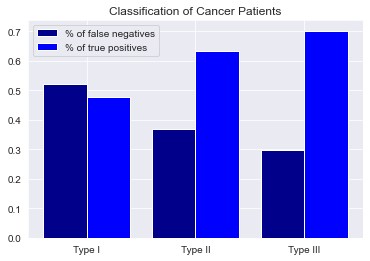

In [41]:
X = ['Type I','Type II','Type III']
fnr = [104/(104+95), 183/(183+314), 92/(92+217)]
tpr = [95/(104+95), 314/(183+314), 217/(92+217)]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, fnr, 0.4, label = '% of false negatives', color = 'darkblue')
plt.bar(X_axis + 0.2, tpr, 0.4, label = '% of true positives', color = 'blue')

plt.xticks(X_axis, X)
plt.title("Classification of Cancer Patients")
plt.legend()
plt.show()

<AxesSubplot:>

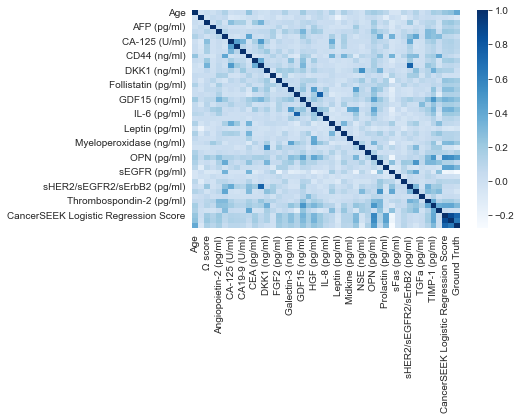

In [42]:
sns.heatmap(df.corr(), cmap="Blues")

In [43]:
# TODO Cancer Type Conv

# Models and Evaluation

## Experimental Setup

### How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?
Our main source of evaluation for our methods was comparison to the original study. In the original paper, they only performed a logistic regression to determine if the individuals had cancer or not. We believed that with more advanced model types we could 1) get a model that performs with higher accuracy and 2) have a model with higher interpretability. Another source of evaluation for us is the Sensitivity(correctly identifying those with cancer) as we do not want to diagnose people with cancer when they do not have it.


### What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?
TODO
Neural Network - Binary Cross Entropy
Logistic Regression - Binary Cross Entropy
Random Forest - TBD

### How did you split your data into train and test sets? Why?
We began by shuffling our data set so that the order of the data would be random. We then used a 80/10/10 Train/Dev/Test split. We chose a 10% test data set as we believed this would be a large enough to allow for adequate training given the variety of cancer and while still giving enough data points to test on.

In [44]:
# Code for loss functions, evaluation metrics or link to Git repo

## Baselines 

What baselines did you compare against? Why are these reasonable?

Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?

## Methods

What methods did you choose? Why did you choose them?

How did you train these methods, and how did you evaluate them? Why?

Which methods were easy/difficult to implement and train? Why?

For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

In [45]:
# Code for training models, or link to your Git repository

In [46]:
# Show plots of how these models performed during training.
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.

# Random Forest

<https://github.com/ChrisWilhelm/MachineLearningFinalProject/blob/main/RandomForest.py>

One method we chose was a Random Forest (link to file above). We initially chose this as we believed it would have the highest interpretability which would lead to better knowledge of which of the proteins actually signal cancer is present in the patient.

For training our models for Random Forests, we used Grid Search Cross Validation to evaluate a number of parameters such as the number of estimators, max depth, min sample split, and criterion. Although the models for random forests are on different datasets, we found that the hyperparameters between the models were very similar for which performed best, so we decided to keep them consistent for the sake of comparison. The random forest specifically was very sensative to hyperparameter change at low number of estimators and low max depth. This makes sense as when there are a low number of estimators and not a very deep tree, this will lead to under fitting as not all the data will be able to be examined by the tree and can lead to a very high bias. Once the hyperparameters were selected, we used cross fold validation to choose the best model with the highest training accuracy.

The Random Forest was a slightly harder than average method to implement, as we had not implemented one previously. We found that once we understood the hyperparameters and what they were referencing, it was not complicated to implement. One aspect of the model that was harder than anticipated was the interpretability with producing the trees shown below and gathering information on the false positives and where there prediction went wrong. In the python file above, we have commented out the code to create new PNGs and printing the path taken by the trees on traversal. This took a while to learn how to generate the trees and also a while to learn how to find the path of traversal.

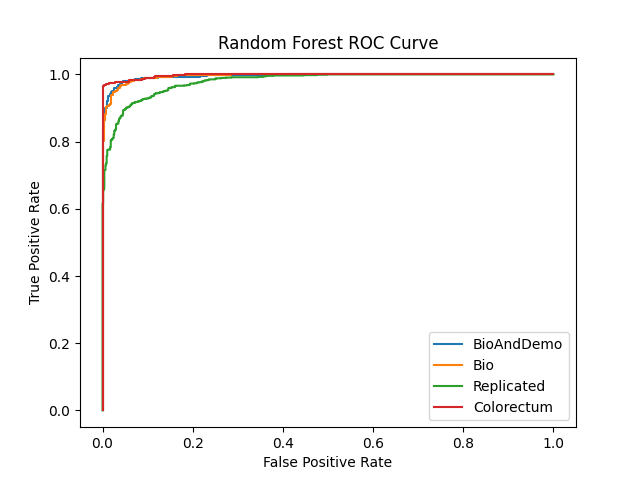

In [47]:
from PIL import Image
rf_roc = Image.open('graphs/rf_roc.png')
rf_roc

Biomarker Data Tree(Tree #5)
Blue = Cancer Positive, Orange = Negative


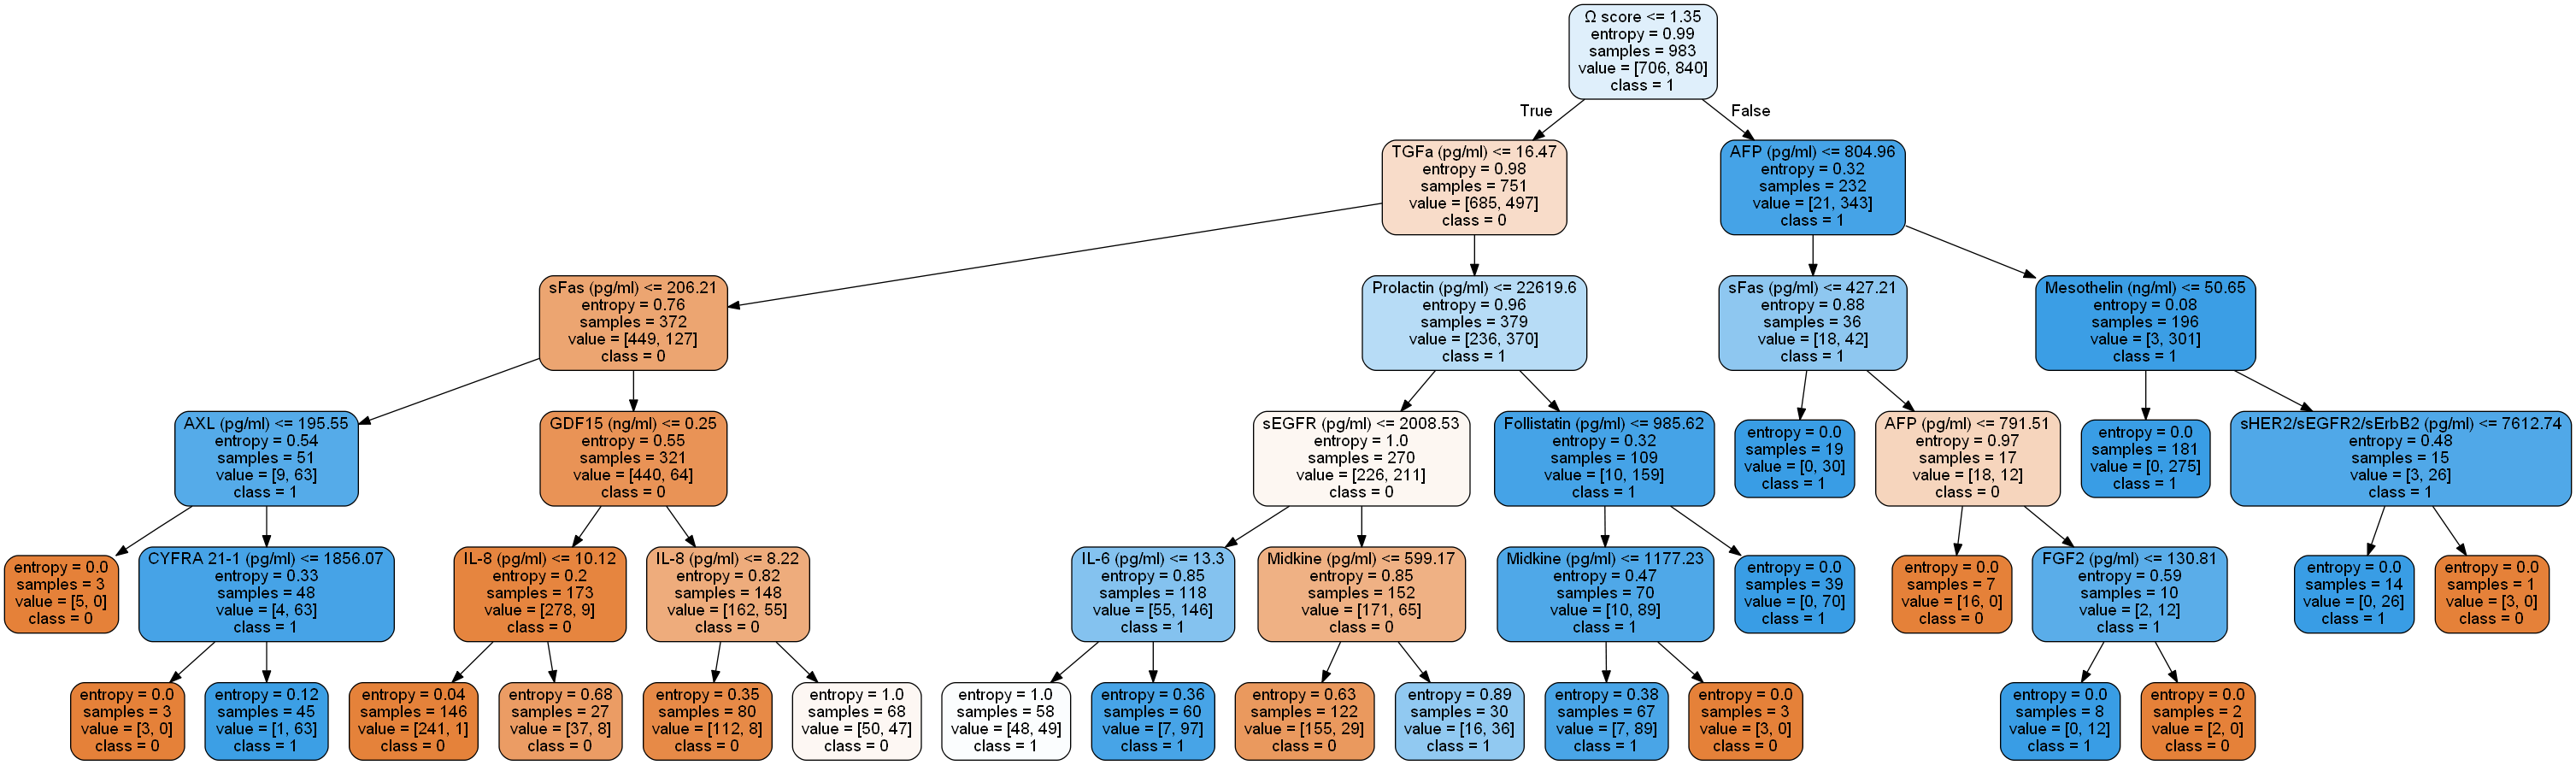

In [48]:
Bio_tree = Image.open('RandomForestVisual/Bio/bio_tree5.png')
print("Biomarker Data Tree(Tree #5)")
print("Blue = Cancer Positive, Orange = Negative")
Bio_tree

Demographic and Biomarker Data Tree(Tree #11)
Blue = Cancer Positive, Orange = Negative


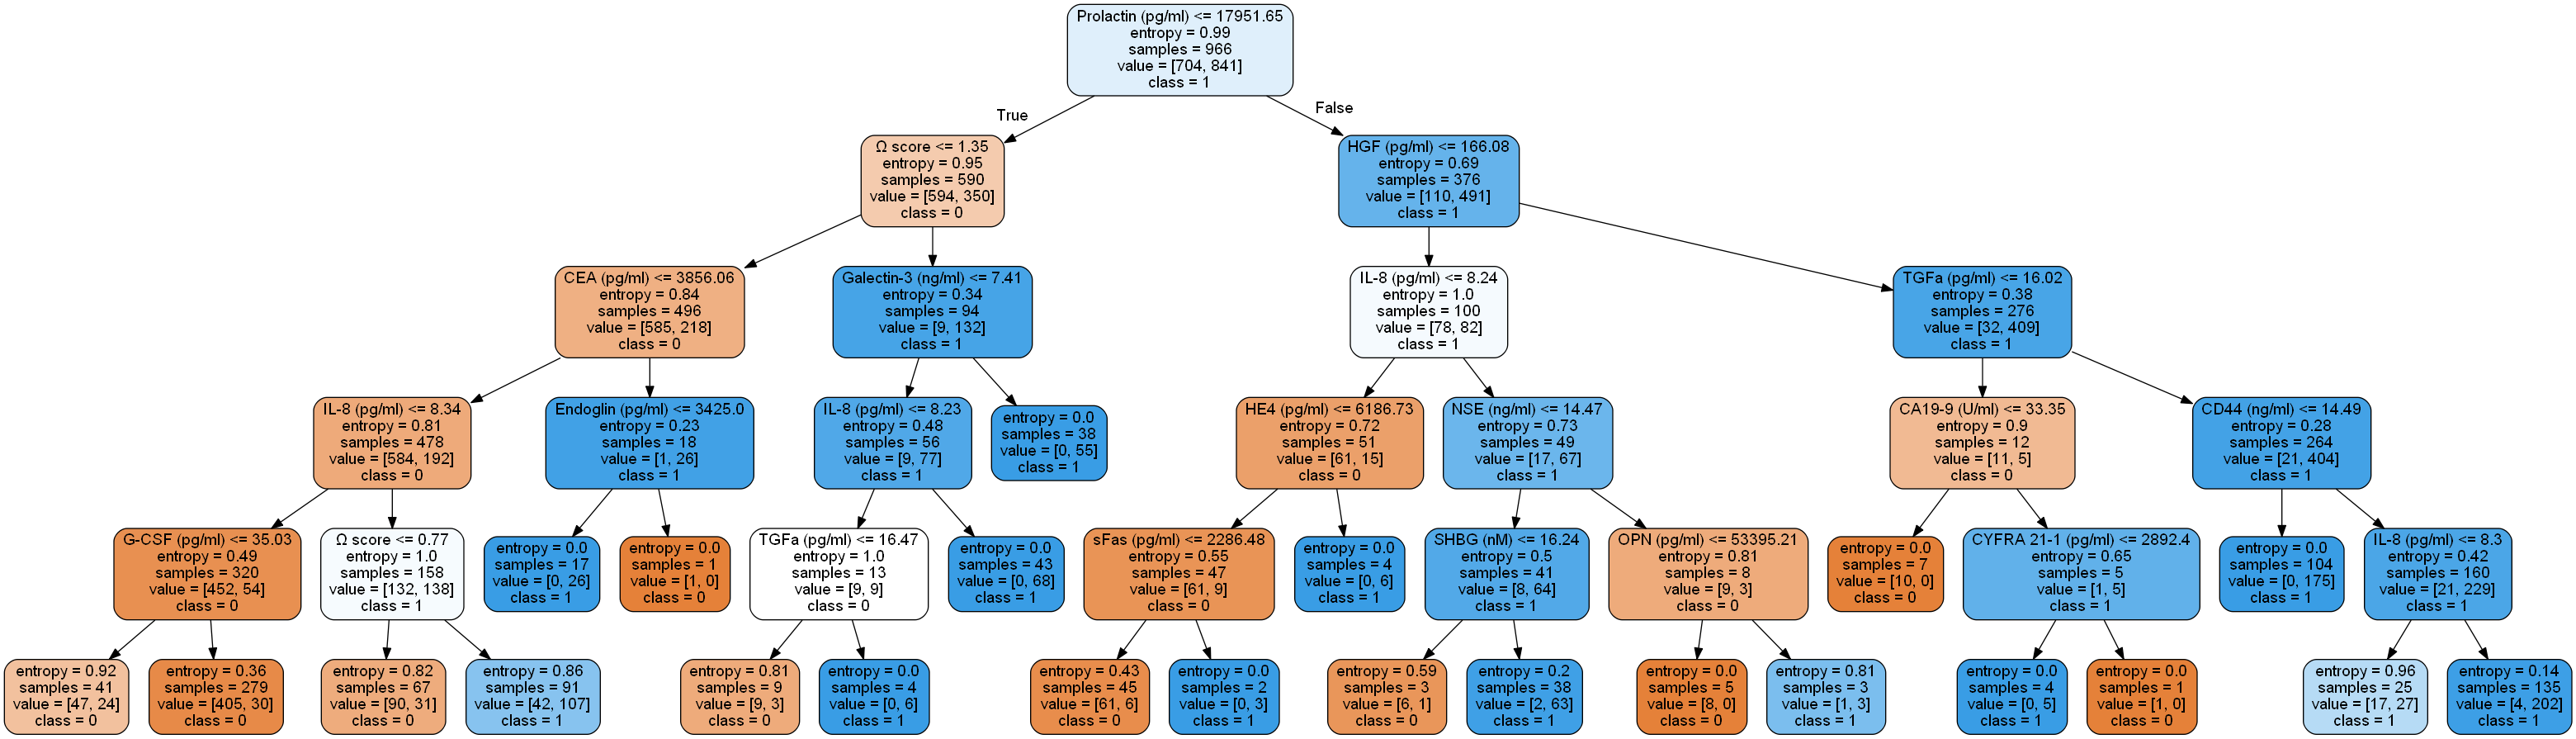

In [49]:
Dem_tree = Image.open('RandomForestVisual/BioAndDemo/dem_tree11.png')
print("Demographic and Biomarker Data Tree(Tree #11)")
print("Blue = Cancer Positive, Orange = Negative")
Dem_tree

Replicated Data Tree(Tree #0)
Blue = Cancer Positive, Orange = Negative


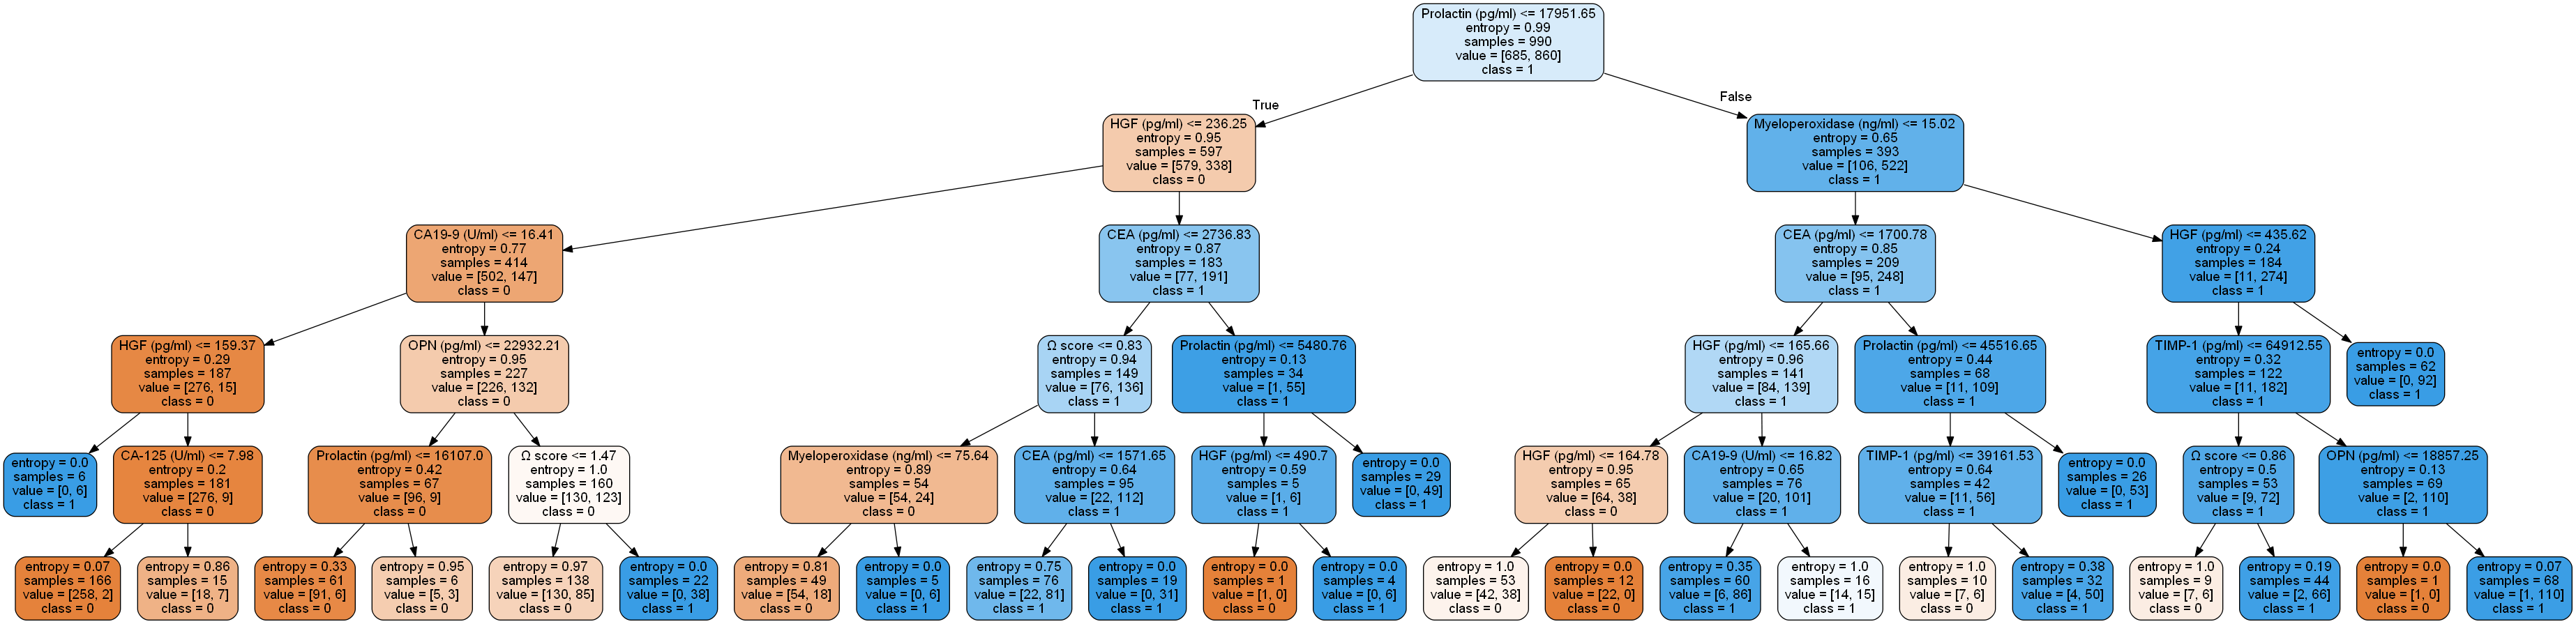

In [50]:
Rep_tree = Image.open('RandomForestVisual/Replicated/rep_tree0.png')
print("Replicated Data Tree(Tree #0)")
print("Blue = Cancer Positive, Orange = Negative")
Rep_tree

Biomarker Data Tree(Tree #8)
Blue = Cancer Positive, Orange = Negative


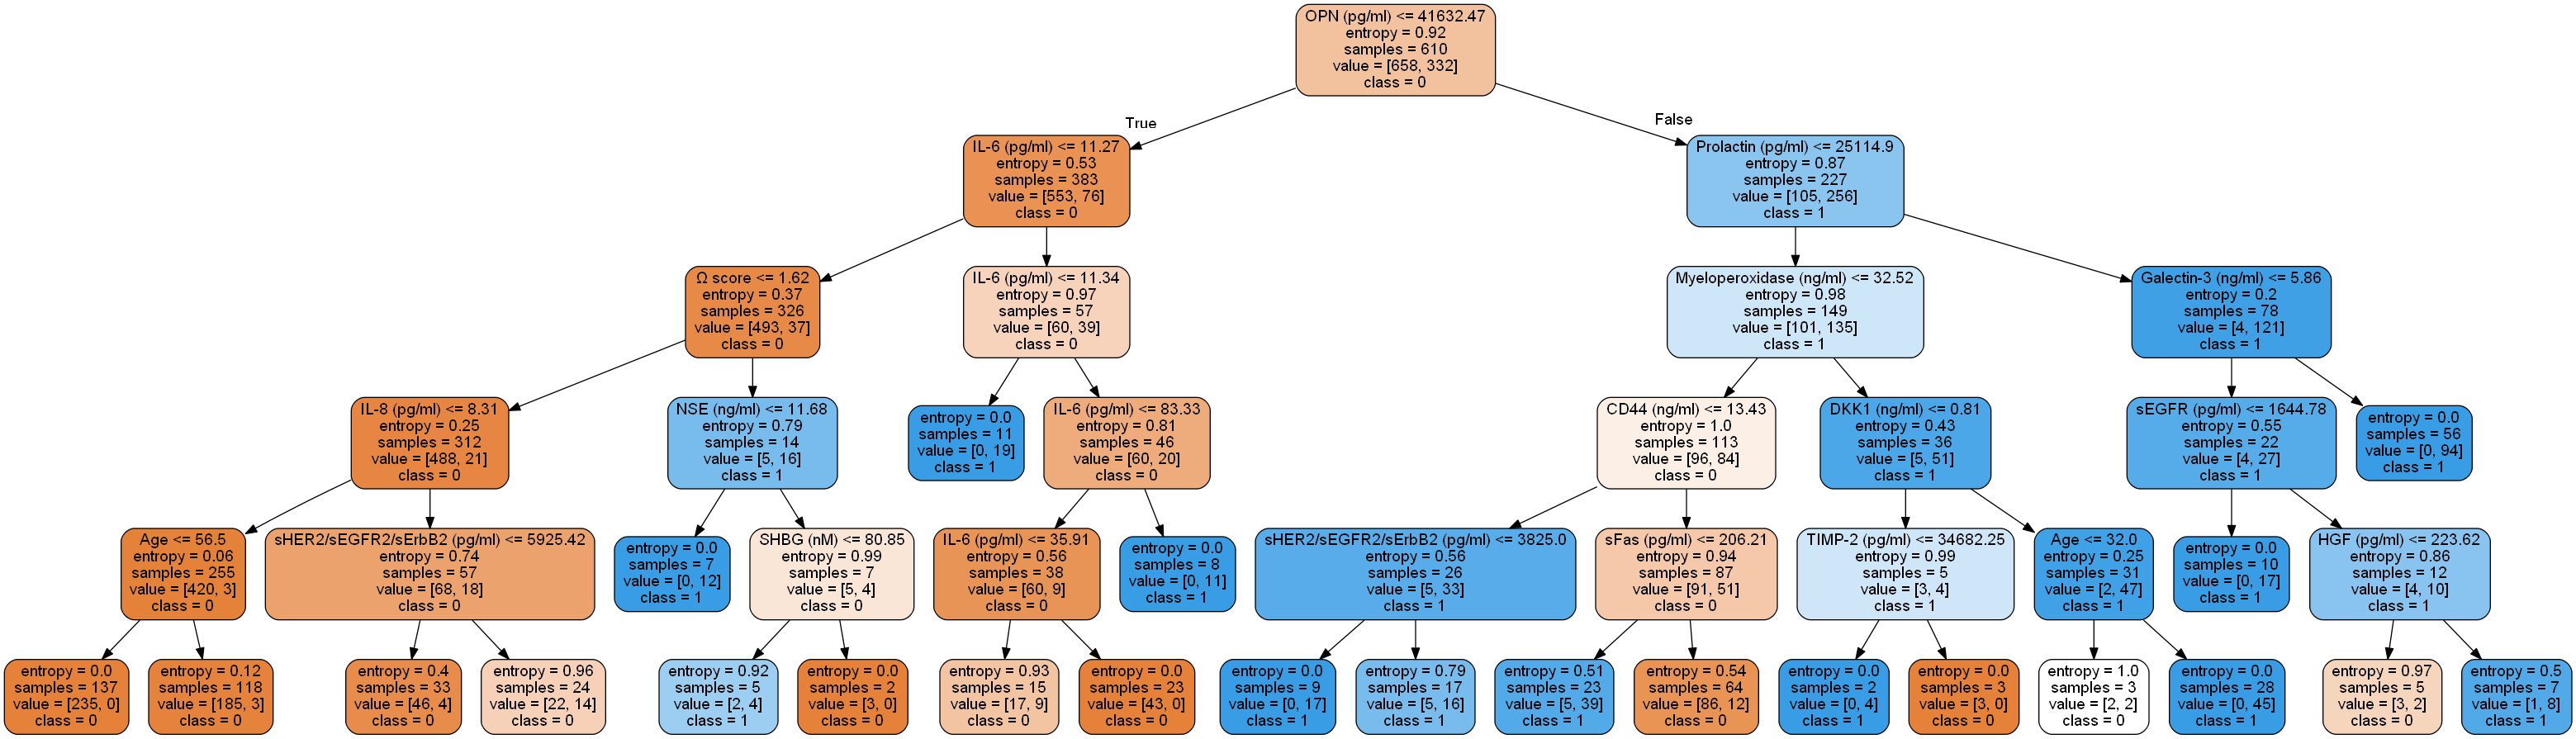

In [51]:
col_tree = Image.open('RandomForestVisual/Colorectum/colorectum_tree8.png')
print("Biomarker Data Tree(Tree #8)")
print("Blue = Cancer Positive, Orange = Negative")
col_tree

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing file with random forest paths for false positive individuals and where they went wrong classifying
# NaN means they started off as 1 and never improved (so there were no incorrect moves)
df = pd.read_csv("RandomForestVisual/RandomForestPaths.csv")
array = df.values

for i in range(1,15):
    print(array[:4,2*i]) #dev bio dataset
    #print(array[6:9, 2*i]) #bio dataset
    #print(array[11:, 2*i]) #replicated dataset

[nan nan nan 'TBD']
['Age' 'Age' 'GDF15' nan]
['IL-8' nan 'CA19-9' 'CA19-9']
['CYFRA 21-1' nan nan nan]
[nan nan nan nan]
[nan nan nan nan]
['Age/OPN' nan nan nan]
['IL-8' nan nan nan]
['OPN' nan 'OPN' 'Prolactin']
['TIMP-1' nan nan 'HGF']
[nan nan 'TGFa' nan]
[nan nan nan nan]
['IL-8' 'IL-8' 'IL-6' nan]
[nan nan 'Age/IL-6/Thrombospondin' nan]


Age: 2 <br>
Age/OPN: 2 <br>
GDF15: 1 <br>
CA19-9: 2 <br>
CYFRA 21-1: 1 <br>
Prolactin: 1 <br>
Age/IL-6/Thrombospondin: 1 <br>
IL-8: 4 <br>
IL-6: 1 <br>
TGFa: 1 <br>
TIMP-1: 1 <br>
HGF: 1 <br>
OPN: 2 <br> <br>
Total: 20

In [53]:
for i in range(1,15):
    print(array[6:9, 2*i]) #bio dataset

['sEGFR' nan nan]
[nan nan nan]
['sEGFR' 'HGF' nan]
['HE4' nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
[nan nan nan]
['Angiopoietin-2' nan nan]
['CYFRA 21-1' nan nan]
[nan nan nan]
[nan 'CA19-9' nan]
['Midkine' 'OPN' nan]
['OPN' nan nan]


sEGFR: 2 <br>
HGF: 1 <br>
HE4: 1 <br>
Angiopoietin-2: 1 <br>
CYFRA 21-1: 1 <br>
Midkine: 1 <br>
OPN: 2 <br>

Total: 9

In [54]:
for i in range(1,15):
     print(array[11:, 2*i]) #replicated dataset

[nan nan nan nan nan nan nan nan nan nan 'CEA/Prolactin']
[nan nan 'CEA' nan nan nan nan nan 'CEA' nan 'CEA']
[nan nan nan nan nan nan nan 'HGF' nan nan nan]
[nan nan 'CEA' nan nan nan nan nan 'CEA' 'Omega' 'CEA']
[nan nan nan 'OPN' nan nan nan 'CA-125' 'OPN' 'OPN' nan]
[nan 'Myeloperoxidase' nan nan nan nan nan 'Myeloperoxidase' nan nan nan]
['CA19-9' 'CA19-9' nan 'CA19-9' nan nan 'CA-125' nan nan 'CA19-9' 'CA19-9']
[nan 'CA-125' 'HGF' nan nan nan nan nan 'CA19-9' nan 'CA-125']
['CA-125' nan nan 'CA-125' nan nan 'CA-125' nan nan 'CA-125' nan]
[nan 'CA19-9' nan 'CA19-9' nan nan nan nan nan 'CA19-9' nan]
[nan nan 'TIMP-1' nan nan 'CPN' nan 'CA-125' nan nan nan]
[nan nan nan nan nan nan 'TIMP-1' 'TIMP-1' 'TIMP-1' 'TIMP-1' 'TIMP-1']
[nan nan nan nan nan 'Omega' nan nan nan nan nan]
[nan nan nan 'TIMP-1' nan 'Omega' nan nan 'TIMP-1' nan nan]


CEA: 6 <br>
CEA/Prolactin: 1 <br>
HGF: 2 <br>
CA-125: 9 <br>
CA19-9: 9 <br>
TIMP-1: 8 <br>
Omega: 3 <br>
CPN: 1 <br>
Myeloperoxidase: 2 <br>

Total: 41

After generating the random forests and finding the specificity on our different datasets (94.8% for dem/bio, 95.2% for bio, 92.8% for replicated), we searched through all of the false positive cases to see if there was a common denominator in all of the trees which incorrectly classified the patients. For the dem/bio dataset, age was the cause of incorrect classifications in 25% of the cases, IL-8 was the cause of 20% of the cases, and for the replicated dataset, CA-125 and CA19-9 were the cause of 21% of the cases. <br> <br>
However, since there were so many decisions in the trees and these features were approximately uniform over all of them, we believe that the reason that some features were present in more of the incorrectly classified cases were simply due to variance. Similarly, due to the limited dataset we do have present, we aren't able to check any additional cases of incorrect classification, so this is the extent that we are able to analyze this issue. Thus, we cannot conclude that any features are causing a disproportional amount of false positive classifications.

|                   | Bio And Demographic | Bio         | Replicated | Colorectum |
| ----------------- | ------------------- | ----------- | ---------- | ---------- |
| ROC, AUC Score    | 0.994650294         | 0.994717508 | 0.9793735  | 0.99737583 |
| Training Accuracy | 0.953488372         | 0.964912281 | 0.9302326  | 1          |
| Test Accuracy     | 0.91                | 0.9         | 0.81       | 0.97       |
| Specificity       | 0.88372093          | 0.837209302 | 0.8604651  | 0.98484848 |
| Sensitivity       | 0.929824561         | 0.947368421 | 0.7719298  | 0.94117647 |

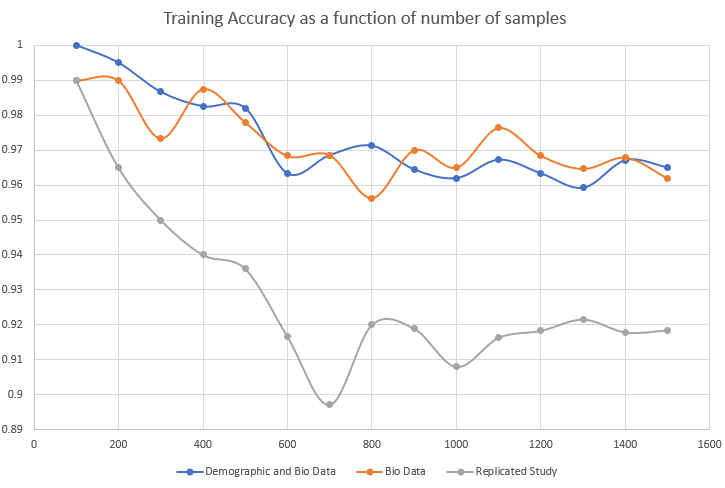

In [55]:
rf_acc = Image.open('graphs/RandomForestAccuracyPlot.png')
rf_acc

## Results

Show tables comparing your methods to the baselines.

What about these results surprised you? Why?

Did your models over- or under-fit? How can you tell? What did you do to address these issues?

What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?  

In [56]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

What concepts from lecture/breakout were most relevant to your project? How so?

What aspects of your project did you find most surprising?

What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?

What was the most helpful feedback you received during your presentation? Why?

If you had two more weeks to work on this project, what would you do next? Why?